In [1]:
#RNN - LSTM

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM


Using TensorFlow backend.


In [2]:
# set parameter
epochs = 10
batch_size = 128
n_classes = 10
data_dim = 28
timesteps = 28



In [3]:
# load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train[:10000,:]  # uncomment to train on less data
# y_train = y_train[:10000]



In [4]:
# data preprocessing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

scale = np.max(x_train) # 255
x_train /= scale
x_test /= scale

mean = np.std(x_train)
x_train -= mean
x_test -= mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
# construct model
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, data_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
# train LSTM
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))




Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.6243 - acc: 0.7945 - val_loss: 0.1870 - val_acc: 0.9396
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1877 - acc: 0.9451 - val_loss: 0.1166 - val_acc: 0.9659
Epoch 3/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1230 - acc: 0.9656 - val_loss: 0.1214 - val_acc: 0.9636
Epoch 4/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0907 - acc: 0.9736 - val_loss: 0.0690 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0725 - acc: 0.9787 - val_loss: 0.0788 - val_acc: 0.9776
Epoch 6/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0605 - acc: 0.9824 - val_loss: 0.0605 - val_acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 117s 2ms/step - 

In [8]:
# evaluate on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 2.309141035079956
Test accuracy: 0.1313


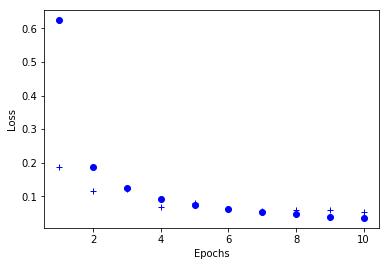

In [9]:
# visualize the loss function in each epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


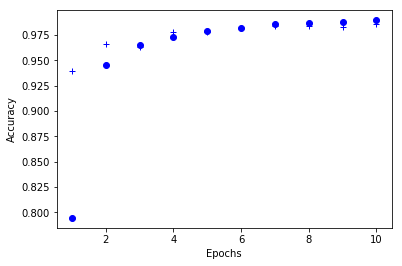

In [10]:
# visualize accuracy in each epoch
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()